# Workshop 7 optional material: Simulating dynamical systems


Physical systems that evolve in time can be easily (but not always quickly) simulated on a computer.   All you need to know is the function that takes the system from its current state to a future state:

$S_2 = f(S_1, dt)$

In the above equation, $S_1$ and $S_2$ represent the current and future states, respectively.  $S_2$ is the state of the system after a short amount of time, $dt$.  The function $f$, which encodes the dynamics of the system, often depends on the current state and the choice of $dt$.  Choosing a smaller time step, $dt$, generally improves the accuracy of any simulation.

For example, the position of a particle, $x(t)$, in one dimension can be written as a function of its velocity $v$:

$\frac{dx}{dt} = v$

You could find $x(t)$ using differential equation solving methods, or you could just simulate the motion of the particle.  To do this, we can express the dynamics as:

\begin{align}
\ x_2 & = f(x_1, dt) \\
\ & = x_1 + v*dt \\
\end{align}

In [1]:
import matplotlib.pyplot as plt

velocity = 1.0
dt = 0.01

def update(x, t):
    '''This is like the function f above; you should
       think of the "state" of the system as its position
       at some time.  We update its state according to the
       dynamics of the system, and I prefer to also update
       the value of time in this same function--but this could
       also be done in the loop below.'''
    
    # update the state and time
    x = x + velocity*dt
    t = t + dt
    
    # return the updated values
    return x, t

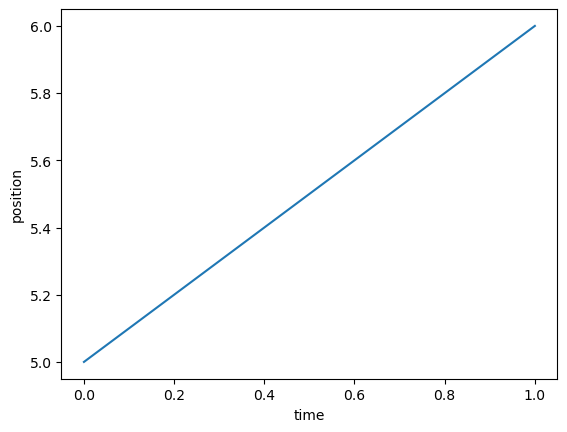

In [2]:
x = 5 # initial x position
t = 0 # initial time

# Some lists to store the positions and times
x_values = [x]  # I like putting the initial values in the list
t_values = [t]

# This is where the actual "simulation" occurs; the update
# function is used in a loop with however many iterations we want
for i in range(100):
    
    x, t = update(x, t)
    x_values.append(x)
    t_values.append(t)
    
# Finally, some plotting to visualize the results
plt.plot(t_values, x_values)
plt.ylabel('position')
plt.xlabel('time')
plt.show()

Wow! It's a straight line.  You probably could've guessed that or used some fancy, built-in ODE solving libraries.  But the point is, if you can write down an `update( )` function for some system, then you can simulate it--whether or not there's an analytical way to find a solution.  

There's a chance that your capstone project is just a variant of this problem, so I don't want to steal away too many project ideas in this notebook.  Once you start simulating a physical system, it's good to consider the accuracy of your simulated "solution".  If you don't have an exact solution to compare against, you can adjust the chosen value of $dt$ and see how it changes the simulation.

## Exercise 1 

Change the code above to simulate a particle under constant acceleration in one dimension.  The `update` function should now also update and return the velocity of the particle.  Plot the position of the particle as a function of time using at least two different choices of time step $dt$.  It may be helpful to include $dt$ as an input parameter to the `update` function so you can easily adjust $dt$ in your simulations.

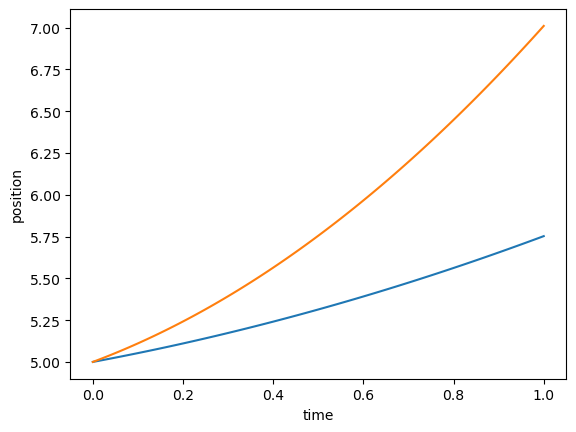

In [3]:
def update(x, t, dt, v, a):
    v = v + a * dt
    x = x + v / 2 * dt
    t = t + dt
    
    return x, t, v

x = 5
t = 0
v = 1.0
a = 1.0
x1_values = [x]
t_values = [t]
for i in range(100):
    x, t, v = update(x, t, 0.01, v, a)
    x1_values.append(x)
    t_values.append(t)  

x = 5
t = 0
v = 1.0
a = 1.0
x2_values = [x]
for i in range(100):
    x, t, v = update(x, t, 0.02, v, a)
    x2_values.append(x)

plt.figure()
plt.plot(t_values, x1_values)
plt.plot(t_values, x2_values)
plt.ylabel('position')
plt.xlabel('time')
plt.show()

Stochastic systems (systems with some randomness) are another great use-case for this method.  [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion) describes the random motion of a particle (like a piece of dust) in a fluid.  The thermal motion of the fluid molecule bumps the dust particle around in a seemingly random, but well-described, process.  (In theory you could also model this by keeping track of the motion of many tiny fluid particles colliding with each other, the walls of some container, and the large dust particle.)  

Below, I've written down an update function for the position of a particle undergoing Brownian motion.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def update(x, t, dt):
    
    x = x + np.sqrt(dt)*np.random.randn()
    t = t + dt
    
    return x, t

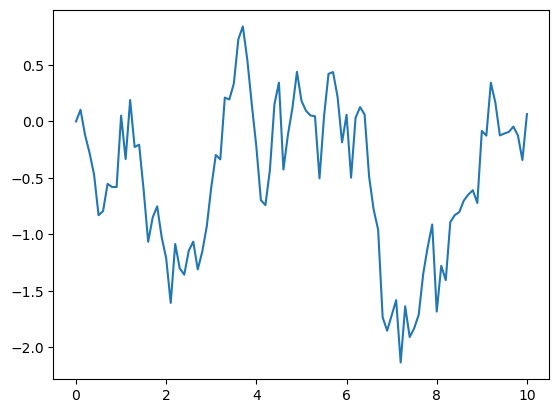

In [5]:
x = 0
t = 0
x_values = [x]
t_values = [t]

for i in range(100):
    
    x, t = update(x, t, 0.1)
    
    x_values.append(x)
    t_values.append(t)
    
plt.plot(t_values, x_values)
plt.show()

## Exercise 2

Repeat the Brownian motion simulation many (~1000) times and plot the distribution of final positions.  The mean of the distribution should be zero, but there is some variance to this distribution.  How does the variance and/or standard deviation of this distribution scale with time? 

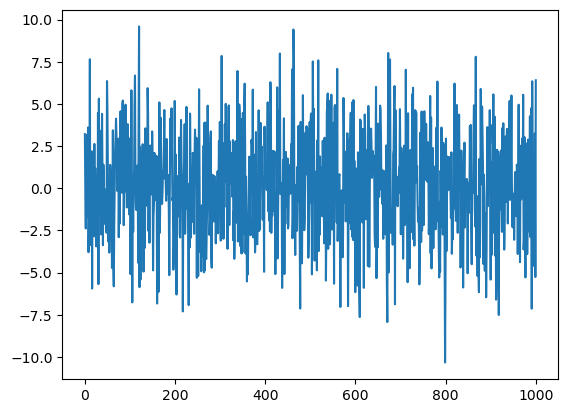

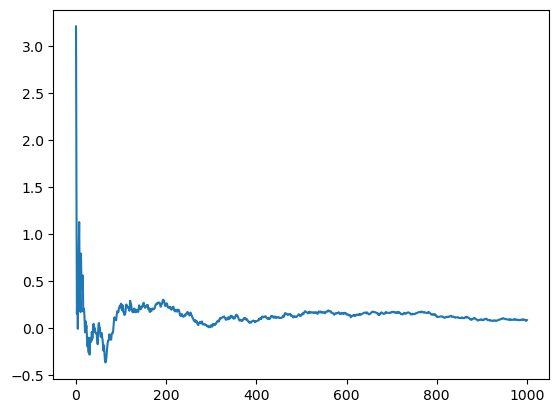

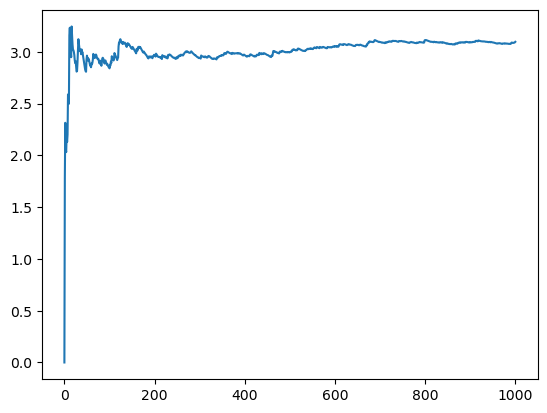

In [8]:
xs = []
means = []
stds = []
n = np.linspace(0, 1000, 1000)
for i in range(1000):
    x = 0
    t = 0
    for j in range(100):
        x, t = update(x, t, 0.1)
    xs.append(x)
    means.append(np.mean(xs))
    stds.append(np.std(xs))

plt.figure()
plt.plot(n, xs)
plt.

plt.figure()
plt.plot(n, means)

plt.figure()
plt.plot(n, stds)

## Viral spreading

(Very relevant in these times of covid...)

For a more complicated example, here's a simulation of viral spreading following the mathematics of [this paper](https://www.pnas.org/content/pnas/111/46/E4911.full.pdf). You can play with the parameter $\mu$ (mu) to see how it controls the nature of the spreading.

In [6]:
import numpy as np

prob = 0.4  # Probability of infection
L = 2000  # Size of grid

# The distribution from which "jumps" are drawn
def jump(y, mu, L, C):
    return np.power((y*(np.power(L, -mu) - np.power(C, -mu)) + np.power(C, -mu)), -1/mu)

# function that updates the state of the population and list of infected individuals
def update(population, infected,  mu, L, C):
    for inf in infected:           
        if np.random.random() > prob:
            start_x = inf[0] 
            start_y = inf[1] 
            angle = np.random.uniform(0, 2*np.pi)
            dist = jump(np.random.random(), mu, L, C)
            end_x = int(start_x + np.cos(angle)*dist) % L
            end_y = int(start_y + np.sin(angle)*dist) % L
            if population[end_x, end_y] == 0:
                population[end_x, end_y] = 1
                infected.append([end_x, end_y])
    
    return population, infected


In [7]:
population = np.zeros((int(L),int(L)))
population[1000,1000] = 1

infected = [[1000,1000]]
  
mu = 1.8
C = 1.5
pending = []
    
ts = []
rs = []
populations = np.zeros((30, int(L), int(L)))

# The simulation -- each iteration is more computationally expensive than the last,
# so be careful changing the number of iterations
for i in range(18):
    populations[i] = population
    population, infected = update(population, infected, mu, L, C)

/tmp/ipykernel_248/4238073940.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  dark = cm.get_cmap('Dark2_r', 256)


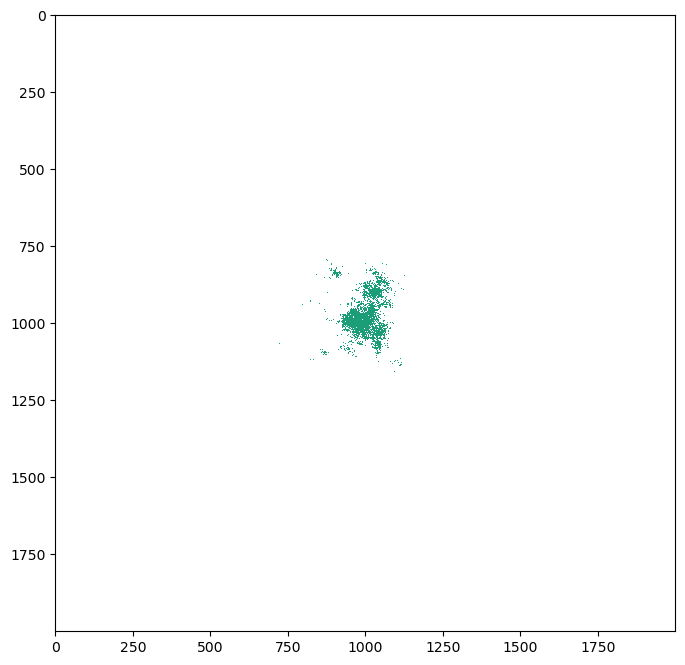

In [14]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm,rc
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

dark = cm.get_cmap('Dark2_r', 256)
newcolors = dark(np.linspace(0, 1, 256))
white = np.array([1,1,1,1])
newcolors[:18, :] = white
newcmp = ListedColormap(newcolors)



fig = plt.figure(figsize=(8,8))

a = populations[17]  # You can change this number to get an earlier/later state of the population

im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1, cmap = newcmp)
plt.show()